In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## NumPy

In [54]:
def normal_distribution(x: float,mu: float,sigma: float) -> float:
    '''
    Returns the normal distribution given a float, the mean and standard deviation of a series
    
    The float
    :param x: float
    The mean
    :param mu: float
    The standard deviation
    :param sigma: float
    :return:
    Normal distribution
    '''
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-1/2*((x-mu)/sigma)**2)


In [55]:
def sigmoid(y: float) -> float:
    '''
    Returns the sigmoid of a float
    
    The float
    :param y: float
    :return:
    Sigmoid of the float
    '''
    return 1/(1 + np.exp(-y))

In [56]:
def weight_update(w,X,y,alpha = 0.0005):
    '''
    Updates the weights using gradient descent
    :param w: weights
    :param X: feature matrix
    :param y: target vector
    :param alpha: learning rate
    :return:
    Updated weights
    '''

    n = len(y)

    error = sigmoid(np.dot(X,w)) - y
    gradient = (1/n) * np.dot(X.T,error)
    w_new = w - alpha * gradient

    return w_new

In [57]:
def mse(y_true,y_pred):
    '''
    Mean Squared Error between true and predicted values
    :param y_true: true values
    :param y_pred: predicted values
    :return:
    Mean Squared Error'''
    
    return np.mean((y_true - y_pred)**2)

In [58]:
def binary_cross_entropy(y_true,y_pred):
    '''
    Binary Cross Entropy between true and predicted values
    :param y_true: true values
    :param y_pred: predicted values
    :return:
    Binary Cross Entropy
    '''
    n = len(y_true)
    return -(1/n)*np.sum((y_true*np.log(y_pred))+((1-y_true)*np.log(1-y_pred)))

## 
---

## Statistical Analysis in Pandas


###     Heart Disease Dataset



In [59]:
heart_df = pd.read_csv('data/heart.csv')
numerical = ['age','trestbps','chol','thalach','oldpeak']
numerical_df = heart_df[numerical]
categorical_df = heart_df.drop(columns=numerical)
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Features

| Feature | Description |
|---------|-------------|
| **age** | Age in years |
| **sex** | 1 = male, 0 = female |
| **cp** (chest pain type) | 0 = asymptomatic, 1 = atypical angina, 2 = non-anginal pain, 3 = typical angina |
| **trestbps** | Resting blood pressure (mm Hg) |
| **chol** | Cholesterol (mg/dl) |
| **fbs** | Fasting blood sugar > 120 mg/dl (1 = yes, 0 = no) |
| **restecg** (resting ECG) | 0 = left ventricular hypertrophy, 1 = normal, 2 = ST-T wave abnormality |
| **thalach** | Maximum heart rate achieved |
| **exang** | Exercise-induced angina (1 = yes, 0 = no) |
| **oldpeak** | ST depression induced by exercise relative to rest |
| **slope** (peak exercise ST segment) | 0 = downsloping, 1 = flat, 2 = upsloping |
| **ca** | Number of major vessels (0–3) |
| **thal** (thalassemia) | 0 = NULL, 1 = fixed defect, 2 = normal blood flow, 3 = reversible defect |
| **target** | Heart disease (1 = no, 0 = yes) |

In [60]:
summary_numerical = pd.DataFrame({
    'mean': numerical_df.mean(),
    'median': numerical_df.median(),
    'mode': numerical_df.mode().iloc[0],
    'std': numerical_df.std(),
    'min': numerical_df.min(),
    'max': numerical_df.max(),
    'variation': numerical_df.var()
})

summary_numerical

,mean,median,mode,std,min,max,variation
age,54.366337,55.0,58.0,9.082101,29.0,77.0,82.484558
trestbps,131.623762,130.0,120.0,17.538143,94.0,200.0,307.586453
chol,246.264026,240.0,197.0,51.830751,126.0,564.0,2686.426748
thalach,149.646865,153.0,162.0,22.905161,71.0,202.0,524.646406
oldpeak,1.039604,0.8,0.0,1.161075,0.0,6.2,1.348095


In [61]:
summary_categorical = categorical_df.apply(lambda col: col.value_counts().sort_index())
summary_categorical.fillna(0).astype(int)

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,96,143,258,147,204,21,175,2,138
1,207,50,45,152,99,140,65,18,165
2,0,87,0,4,0,142,38,166,0
3,0,23,0,0,0,0,20,117,0
4,0,0,0,0,0,0,5,0,0


In [62]:
heart_df.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

#### Conclusion

| Feature | Correlation | Strength |
|---------|-------------|----------|
| cp | 0.433798 | Medium Positive |
| thalach | 0.421741 | Medium Positive |
| slope | 0.345877 | Medium Positive |
| thal | -0.344029 | Medium Negative |
| ca | -0.391724 | Medium Negative |
| oldpeak | -0.430696 | Medium Negative |
| exang | -0.436757 | Medium Negative |

### Used Car Dataset

In [63]:
car_df = pd.read_csv('data/Dataset.csv')

numerical_df_car = car_df[['price','distance_travelled(kms)','car_age']]
categorical_df_car = car_df[['fuel_type','city']]

car_df = car_df[[
    'price',
    'distance_travelled(kms)',
    'fuel_type',  
    'city', 
    'brand', 
    'car_age',
]]

car_df.head()


,price,distance_travelled(kms),fuel_type,city,brand,car_age
0,425000.0,9680.0,Petrol,Mumbai,Honda,5.0
1,325000.0,119120.0,Diesel,Mumbai,Nissan,9.0
2,2650000.0,64593.0,Diesel,Thane,Toyota,4.0
3,4195000.0,25000.0,Diesel,Mumbai,Mercedes-Benz,4.0
4,475000.0,23800.0,Diesel,Mumbai,Hyundai,9.0


| Dropped Column | Reason |
|--------|--------|
| Unnamed: 0 | Index column |
| Id | Unique identifier |
| year | Redundant with car_age |
| full_model_name | Too granular, overfitting risk |
| model_name | Too granular, overfitting risk |
| brand_rank | Redundant with brand, less relevant |
| inv_car_price | Derived from target, leakage |
| inv_car_dist | Unclear transformation/ Multicoliniarity? |
| inv_car_age | Unclear transformation/ Multicoliniarity?  |
| inv_brand | Unclear transformation/ Multicoliniarity?  |
| std_invprice | Derived from target, leakage |
| std_invdistance_travelled | Unclear transformation/ Multicoliniarity?  |
| std_invrank | Unclear transformation/ Multicoliniarity?  |
| best_buy1 | Likely uses price, leakage |
| best_buy2 | Likely uses price, leakage |

In [64]:
summary_numerical = pd.DataFrame({
    'mean': numerical_df_car.mean(),
    'median': numerical_df_car.median(),
    'mode': numerical_df_car.mode().iloc[0],
    'std': numerical_df_car.std(),
    'min': numerical_df_car.min(),
    'max': numerical_df_car.max(),
    'variation': numerical_df_car.var()
})

summary_numerical

,mean,median,mode,std,min,max,variation
price,1.494837e+06,875000.0,750000.0,1.671658e+06,62500.0,14700000.0,2.794440e+12
distance_travelled(kms),5.384826e+04,49000.0,55000.0,4.472554e+04,350.0,790000.0,2.000374e+09
car_age,5.609275e+00,5.0,3.0,3.207504e+00,0.0,31.0,1.028808e+01


In [65]:
car_df['city'].value_counts().head(10)

city
Chennai      493
Bangalore    247
Pune         247
Hyderabad    245
Delhi        187
Mumbai       165
Dehradun      56
Thane         48
Noida         12
Ghaziabad     10
Name: count, dtype: int64

In [66]:
car_df['fuel_type'].value_counts()

fuel_type
Diesel        922
Petrol        788
CNG + 1         8
Petrol + 1      6
Hybrid          1
Name: count, dtype: int64

In [67]:
car_df['brand'].value_counts().head(10)

brand
Hyundai          297
Maruti Suzuki    275
Honda            153
Mercedes-Benz    131
Toyota           117
BMW              111
Audi              98
Mahindra          93
Ford              78
Volkswagen        70
Name: count, dtype: int64

In [68]:
fuel_corr = pd.get_dummies(car_df['fuel_type']) \
    .join(car_df['price']) \
    .corr()['price'] \
    .sort_values(ascending=False)
fuel_corr

price         1.000000
Diesel        0.269330
Hybrid        0.008721
Petrol + 1   -0.034109
CNG + 1      -0.043825
Petrol       -0.260109
Name: price, dtype: float64

In [69]:
city_corr = pd.get_dummies(car_df['city']) \
    .join(car_df['price']) \
    .corr()['price'] \
    .sort_values(ascending=False)

pd.concat([city_corr.head(5), city_corr.tail(5)])


price        1.000000
Dehradun     0.259614
Delhi        0.150974
Faridabad    0.084201
Panchkula    0.008001
Ghaziabad   -0.028646
Noida       -0.054628
Thane       -0.067238
Pune        -0.088649
Bangalore   -0.122275
Name: price, dtype: float64

In [70]:
brand_corr = pd.get_dummies(car_df['brand']) \
    .join(car_df['price']) \
    .corr()['price'] \
    .sort_values(ascending=False)

pd.concat([brand_corr.head(5), brand_corr.tail(5)])


price            1.000000
Mercedes-Benz    0.306563
BMW              0.274172
Lamborghini      0.224361
Land Rover       0.221076
Renault         -0.090457
Volkswagen      -0.096231
Honda           -0.156135
Hyundai         -0.200921
Maruti Suzuki   -0.237643
Name: price, dtype: float64

In [71]:
numerical_corr = numerical_df_car.corr()['price']
numerical_corr

price                      1.000000
distance_travelled(kms)   -0.137351
car_age                   -0.288483
Name: price, dtype: float64

#### Conclusion

While car age shows a significant negative correlation with the price, distance travelled has an unexpected weak negative correlation.
As for categorical features, due to the number of cities and car brands one hot encoding all of them is unfeasible and will be prone to overfitting thus our strategy is to use only the features based within a correlation range on price. Fuel type is also predictive of price with diesel and petrol being most predictive.

From a business perspective, features like car age and distance travelled show a logical negative correlation since they impact a cars reliability and maintenance costs. Car brand is also expressive of status especially in so perceived luxury brands with Mercedes and BMW showing higher prices. A quick research on the car market in india (where this dataset is from) shows that diesel is generally cheaper to run than petrol which could explain the saturation of diesel cars at higher prices. Similarly some cities have a higher correlation with price which could be both due to higher demand and better economic conditions in those areas.

##
---

## Linear Regression

#### Recap

Coming back to the used car dataset, we have 3 numerical features and 3 categorical features. We will use only the diesel and petrol fuel types as they are the most common and predictive of price. The city and brand features will be encoded based on the most influential values in each category. Since our dataset columns have relatively low correlation with price, i decided to use a more forgiving range of corr >= 0.2.


In [72]:
# Filter to Diesel and Petrol only
car_df = car_df[car_df['fuel_type'].isin(['Diesel', 'Petrol'])].copy()

# One-hot encoding
car_df = pd.get_dummies(car_df, columns=['fuel_type', 'city', 'brand'], drop_first=True).astype(float)

# Filter features by correlation
#corr = car_df.corr()['price'].abs()
#car_df = car_df[corr[(corr >= 0.2) | (corr.index == 'price')].index]

# Split
X = car_df.drop('price', axis=1)
y = car_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
train_mean = X_train.mean()
train_std = X_train.std()
X_train = (X_train - train_mean) / (train_std + 1e-8) # Avoid division by zero
X_test = (X_test - train_mean) / (train_std + 1e-8)

# Train
model = LinearRegression()
model.fit(X_train, y_train)

train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

print(f"Train R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")


Train R2: 0.6319
Test R2: 0.6294


In [73]:
class LinearRegressionCustom:

    """
    Linear Regression using Gradient Descent.
    
    MSE Loss:
        E = 1/n * Σ(yi - (m·xi + b))²
    
    Gradients:
        ∂E/∂m = -2/n * Σ(xi · (y - (mx + b))) = -2/n * Σ(xi · error)
        ∂E/∂b = -2/n * Σ(y - (mx + b))        = -2/n * Σ(error)
        
    """
    
    def __init__(self, epochs=1000, lr=0.01):
        self.epochs = epochs
        self.lr = lr
        self.m = None
        self.b = 0
        self.loss_hist = []

    def predict(self, X):
        # Handle single feature
        if X.ndim == 1:
            #same as X.reshape(len(X), 1)
            X = X.reshape(-1, 1)
        return np.dot(X, self.m) + self.b

    def fit(self, X, y):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        n = len(X)
        self.m = np.zeros(X.shape[1])
        
        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.m) + self.b
            errors = y - y_pred

            gradient_m = -(2/n) * np.dot(X.T, errors)
            gradient_b = -(2/n) * np.sum(errors)

            self.m -= gradient_m * self.lr
            self.b -= gradient_b * self.lr

            mse = np.mean(errors**2)
            self.loss_hist.append(mse)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: MSE = {mse:.4f}")

    def score(self, X, y):
        X = np.array(X)
        y = np.array(y)
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred)**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        return 1 - (ss_res / ss_tot)

In [74]:
# Train
lin_model = LinearRegressionCustom(1000, 0.01)
lin_model.fit(X_train, y_train)

train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

print(f"Train R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")

Epoch 0: MSE = 5001541088450.2920
Epoch 100: MSE = 1149682344228.3030
Epoch 200: MSE = 1066341255006.8832
Epoch 300: MSE = 1054723187662.1310
Epoch 400: MSE = 1048557758626.1626
Epoch 500: MSE = 1044029638045.3613
Epoch 600: MSE = 1040488554550.4661
Epoch 700: MSE = 1037682032731.9459
Epoch 800: MSE = 1035450884718.4894
Epoch 900: MSE = 1033675849927.6268
Train R2: 0.6319
Test R2: 0.6294


#### Results

| Feature Set | Train R² | Test R² |
|-------------|----------|---------|
| Highly Correlated Features (corr >= 0.2) | 0.4578 | 0.4531 |
| All Features | 0.6319 | 0.6294 |
| All Features (Custom) | 0.6299 | 0.6295 |

#### Conclusion

By omitting less correlated features, the model's performance dropped significantly, indicating that for this specific high cardinality case the lowly correlated data still has a high influence. The custom linear regression implementation performed similarly to the scikit-learn version.

##
---

## Logistic Regression

#### Recap

For logistic regression, we will use the heart disease dataset. We will experiment with training the model using all features vs only the most correlated features (corr >= 0.5 and <= 0.8).

In [75]:
# One-hot encoding
heart_df = pd.get_dummies(heart_df, columns=categorical_df.drop('target', axis=1).columns, drop_first=True)

# Filter features by correlation
'''
corr = heart_df.corr()['target'].abs()
high_corr_features = corr[(corr >= 0.5) & (corr <= 0.8)].index.tolist()
target_feature = ['target']  # Keep target column
selected_features = high_corr_features + target_feature
heart_df = heart_df[selected_features]
'''

# Split
X = heart_df.drop('target', axis=1)
y = heart_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
train_mean, train_std = X_train.mean(), X_train.std()
X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std

# Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.8802
Test Accuracy: 0.8689


In [76]:
class LogisticRegressionCustom:
    
    def __init__(self,epochs=1000,lr=0.01):

        self.epochs = epochs
        self.lr = lr
        self.m = None
        self.b = 0
        self.loss_hist = []
        
    def predict(self,X):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        return sigmoid(np.dot(X, self.m) + self.b)
    
    def predict_class(self, X, threshold=0.5):
        return (self.predict(X) >= threshold).astype(int)
    
    def fit(self,X,y):

        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        n = len(X)
        self.m = np.zeros(X.shape[1])
        
        for epoch in range(self.epochs):

            y_pred = sigmoid(np.dot(X, self.m) + self.b)
            errors = y - y_pred

            gradient_m = -(1/n) * np.dot(X.T, errors)
            gradient_b = -(1/n) * np.sum(errors)

            self.m -= gradient_m * self.lr
            self.b -= gradient_b * self.lr

            bce = -np.mean(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
            self.loss_hist.append(bce)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: BCE = {bce:.4f}")

In [77]:
# Train
log_model = LogisticRegressionCustom(1000,0.05)
log_model.fit(X_train, y_train)

# Evaluate
train_acc = accuracy_score(y_train, log_model.predict_class(X_train))
test_acc = accuracy_score(y_test, log_model.predict_class(X_test))

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 0: BCE = 0.6931
Epoch 100: BCE = 0.3540
Epoch 200: BCE = 0.3235
Epoch 300: BCE = 0.3100
Epoch 400: BCE = 0.3026
Epoch 500: BCE = 0.2980
Epoch 600: BCE = 0.2950
Epoch 700: BCE = 0.2929
Epoch 800: BCE = 0.2915
Epoch 900: BCE = 0.2905
Train Accuracy: 0.8719
Test Accuracy: 0.8689


#### Results

| Feature Set | Train Accuracy | Test Accuracy |
|-------------|----------|---------|
| Highly Correlated Features (0.5 <= corr <= 0.8) | 0.7562 | 0.8033 |
| All Features | 0.8802 |  0.8689 |
| All Features (Custom) | 0.8719 | 0.8689 |

#### Conclusion

Using only the highly correlated features led to a noticeable drop in accuracy, suggesting that features with a lower correlation also contribute to the model's accuracy. The custom logistic regression implementation achieved comparable results to the scikit-learn version.

##
---

## Comparison and Conclusion


#### Comparison Summary

| Aspect              | Linear Regression        | Logistic Regression     |
|---------------------|--------------------------|-------------------------|
| Task Type           | Continuous prediction    | Binary classification   |
| Output Range        | (-inf, +inf)                | [0, 1]                  |
| Loss Function       | MSE                      | Binary Cross-Entropy    |
| Activation          | None                     | Sigmoid                 |
| Evaluation Metric   | R²                       | Accuracy                |
| Dataset Used        | Used Cars                | Heart disease           |
| Best Test Score     | 0.6295                   | 0.8852                  |

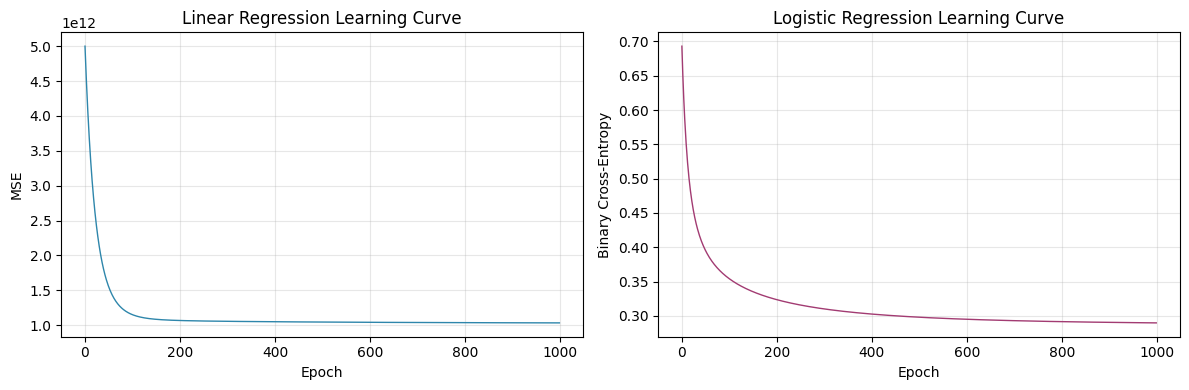

In [78]:

plt.figure(figsize=(12, 4))

# Linear Regression Learning Curve
plt.subplot(1, 2, 1)
plt.plot(lin_model.loss_hist, linewidth=1, color='#2E86AB')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Linear Regression Learning Curve')
plt.grid(alpha=0.3)

# Logistic Regression Learning Curve
plt.subplot(1, 2, 2)
plt.plot(log_model.loss_hist, linewidth=1, color='#A23B72')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy')
plt.title('Logistic Regression Learning Curve')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Conclusion

While the heart disease problem was intuitively solved due to a vast number of highly correlated features, the used car dataset posed more of a data selection problem due to its high cardinality categorical features which correlated with the price only to some extent and barely surpassing a moderate correlation for even the most predictive features. Futhermore the choice of features heavily influenced the performance of the models with the correlation filter provoking a decrease in the performance of both.
